Producing Figure 3b from OzBench et al 2008
======

This script produces Figure 3b from the [OzBench et al, 2008](http://www.sciencedirect.com/science/article/pii/S0031920108002318) benchmark using a glucifer store saved in ``OzBenchEtAl-2008.ipynb``. 

**References**

1. OzBench, M.; Regenauer-Lieb, K.; Stegman, D. R.; Morra, G.; Farrington, R.; Hale, A.; May, D. A.; Freeman, J.; Bourgouin, L.; Mühlhaus, H. & Moresi, L. A model comparison study of large-scale mantle-lithosphere dynamics driven by subduction. Physics of the Earth and Planetary Interiors, 2008, 171, 224-234. [OzBench, 2008](http://www.sciencedirect.com/science/article/pii/S0031920108002318)

In [1]:
import underworld as uw
import math
from underworld import function as fn
import glucifer
import numpy as np
import os

In [2]:
outputPath = os.path.join(os.path.abspath("."),"OzBenchOutput/")

if uw.rank()==0:
    if not os.path.exists(outputPath):
        os.makedirs(outputPath)
uw.barrier()

In [3]:
saved = glucifer.Viewer('ozBench')

Create figure for each saved timestep

In [4]:
figParticle = saved["Particles"]
sc = figParticle.script('translate y 0.5')
sc = figParticle.script('rotate y 60')
sc = figParticle.script('rotate x 30')
sc = figParticle.script('zoom 0.1')

for step in saved.steps:
    saved.step = step
    figParticle.quality = 3
    figParticle["title"] = "Timestep ##"
    figParticle.save(outputPath + "ozBenchParticle_"+ str(step).zfill(4))



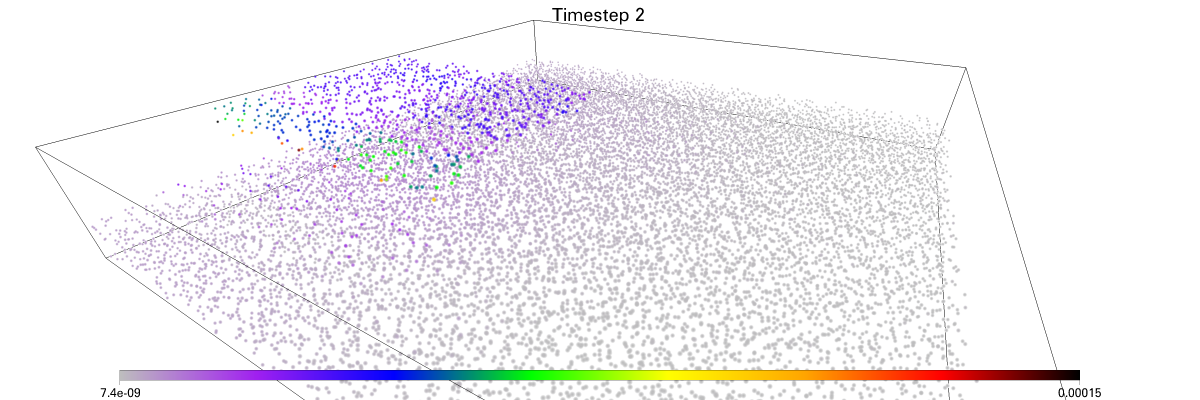

In [5]:
figParticle.show()